## Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
# Globals
RED = '#ef4123'
GRAY = '#545453'

### Preparations

In [2]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
y = np.array([6, 6, 11, 17, 16, 20, 23, 23, 29, 33, 39])

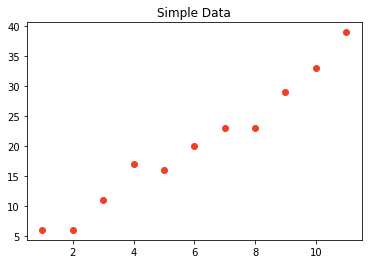

In [3]:
plt.title("Simple Data")
plt.scatter(x = x, y = y, color=RED)

In [4]:
def print_evaluation_metrics(actual_values, predictions):
    print (f'MAE: {metrics.mean_absolute_error(actual_values, predictions)}')
    print (f'MSE: {metrics.mean_squared_error(actual_values, predictions)}')
    print(f'RMSE: {sqrt(metrics.mean_squared_error(actual_values, predictions))}')
    print (f'R Squared: {metrics.r2_score(actual_values, predictions)}')

### Implementation

In [5]:
class MyLinearRegression():
    ''' Class that implemnets Simple Linear Regression '''
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def fit(self, X, y):
        mean_x = np.mean(X)
        mean_y = np.mean(y)
        
        SSxy = np.sum(np.multiply(X, y)) - len(x) * mean_x * mean_y
        SSxx = np.sum(np.multiply(X, x)) - len(x) * mean_x * mean_x
        
        self.b1 = SSxy / SSxx
        self.b0 = mean_y - self.b1 * mean_x
    
    def predict(self, input_data):
        return self.b0 + self.b1 * input_data

In [6]:
model = MyLinearRegression()
model.fit(x, y)

In [7]:
predictions = model.predict(x)

In [8]:
print_evaluation_metrics(y, predictions)

MAE: 1.4148760330578511
MSE: 3.441322314049586
RMSE: 1.8550801368268666
R Squared: 0.9663868259606071


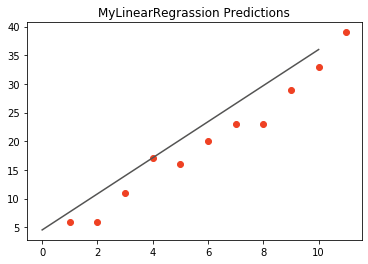

In [9]:
plt.title("MyLinearRegrassion Predictions")
plt.scatter(x = x, y = y, color=RED)
plt.plot(predictions, color=GRAY)
plt.show()

## Multiple LInear Regression

### Prepare and Load Data

In [10]:
data = pd.read_csv('./data/boston_housing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
X = data.drop('medv', axis=1).values
y = data['medv'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

### Implementation

In [12]:
class MyMultipleLinearRegression():
    ''' Class that implements Multiple Linear Regression '''
    def __init__(self):
        self.b = 0
        self.w = []
        
    def fit(self, X, y):
        # If there is only one feature we need to reshape input.
        if len(X.shape) == 1:
            X.reshape(-1, 1)
            
        # Add 'ones' to model coefficient b in data.
        ones = np.ones(shape=X.shape[0]).reshape(-1, 1)
        X = np.concatenate((ones, X), 1)
        
        coeficients = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
        self.b = coeficients[0]
        self.w = coeficients[1:]

    def predict(self, X):
        predictions = []
        for x in X:
            prediction = self.b

            for xi, wi in zip(x, self.w):
                prediction += wi * xi
            
            predictions.append(prediction)
            
        return predictions

In [13]:
model = MyMultipleLinearRegression()
model.fit(X_train, y_train)

In [14]:
model.b

33.04606446320732

In [15]:
model.w

array([-1.11307273e-01,  5.00960846e-02,  2.95392471e-02,  3.00839630e+00,
       -1.53479542e+01,  4.04002314e+00, -1.43524468e-03, -1.54300055e+00,
        3.23076531e-01, -1.35366479e-02, -8.38134260e-01,  8.73220222e-03,
       -5.83597765e-01])

In [16]:
predictions = model.predict(X_test)

In [17]:
print_evaluation_metrics(y_test, predictions)

MAE: 3.5237844319690903
MSE: 22.042579216213106
RMSE: 4.694952525448272
R Squared: 0.692290880551212


In [18]:
pd.DataFrame({
    'Actual Value': y_test,
    'MyMultipleLinearRegression Prediction': predictions,
})

,Actual Value,MyMultipleLinearRegression Prediction
0,20.5,20.535939
1,5.6,11.400370
2,13.4,13.024932
3,12.6,18.448961
4,21.2,22.634241
...,...,...
97,25.0,25.216456
98,19.5,16.798470
99,19.9,20.075704
100,15.4,14.467506


## Using SciKit Learn

In [19]:
# Re-Train implementation
model.fit(X_train, y_train)

# Use and train SciKit Learn Linear Regression
sk_model = LinearRegression()
sk_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Make predictions
sk_predictions = sk_model.predict(X_test)
predictions = model.predict(X_test)

In [21]:
print_evaluation_metrics(y_test, predictions)

MAE: 3.5237844319690903
MSE: 22.042579216213106
RMSE: 4.694952525448272
R Squared: 0.692290880551212


In [22]:
# Compare
pd.DataFrame({
    'Actual Value': y_test,
    'MyMultipleLinearRegression Prediction': predictions,
    'SciKit Prediction': sk_predictions,
})

,Actual Value,MyMultipleLinearRegression Prediction,SciKit Prediction
0,20.5,20.535939,20.535939
1,5.6,11.400370,11.400370
2,13.4,13.024932,13.024932
3,12.6,18.448961,18.448961
4,21.2,22.634241,22.634241
...,...,...,...
97,25.0,25.216456,25.216456
98,19.5,16.798470,16.798470
99,19.9,20.075704,20.075704
100,15.4,14.467506,14.467506


### Using Stochastic Gradient Descent

In [23]:
sgd_pipeline = make_pipeline(StandardScaler(), SGDRegressor(max_iter=10000, alpha=0.1))
sgd_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.1, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=10000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [24]:
sgd_predictions = sgd_pipeline.predict(X_test)

In [25]:
print_evaluation_metrics(y_test, sgd_predictions)

MAE: 3.348627886654093
MSE: 21.05396435085056
RMSE: 4.588459910563735
R Squared: 0.7060917069749609


In [26]:
pd.DataFrame({
    'Actual Value': y_test,
    'MyMultipleLinearRegression Prediction': predictions,
    'SciKit Model Prediction': sk_predictions,
    'SciKit SGD Model Prediction': sgd_predictions,
})

,Actual Value,MyMultipleLinearRegression Prediction,SciKit Model Prediction,SciKit SGD Model Prediction
0,20.5,20.535939,20.535939,18.827904
1,5.6,11.400370,11.400370,12.466127
2,13.4,13.024932,13.024932,13.208354
3,12.6,18.448961,18.448961,18.985023
4,21.2,22.634241,22.634241,22.603166
...,...,...,...,...
97,25.0,25.216456,25.216456,24.704938
98,19.5,16.798470,16.798470,17.343832
99,19.9,20.075704,20.075704,19.671453
100,15.4,14.467506,14.467506,16.257838
